# 14 - Singular Value Decomposition

## 14.1 - Eigenvalues and Eigenvectors

### 14.1.1 - Definition and Properties

Let $A$ be an $n \times n$ matrix. A non-zero vector $\textbf{x}$ in $\mathbb{R}^n$ is called an **eigenvector** of $A$ if there exists a scalar $\lambda$ (which can be real or complex) such that

$$ A\textbf{x} = \lambda\textbf{x} $$

Here, $\lambda$ is known as an **eigenvalue** corresponding to the eigenvector $\textbf{x}$.

#### Remarks

- **Non-zero requirement:** The vector $\textbf{x}$ must be non-zero to qualify as an eigenvector because the zero vector would trivially satisfy the equation for any $\lambda$, providing no useful information.
- **Scalar multiples:** If $\textbf{x}$ is an eigenvector associated with the eigenvalue $\lambda$, then any scalar multiple $\alpha\textbf{x}$ (where $\alpha$ is a non-zero scalar) is also an eigenvector associated with $\lambda$. This property underscores the fact that eigenvectors are defined up to a scalar multiple.

#### Normalization of Eigenvectors

Given the scalar multiples property, eigenvectors are often normalized for convenience and standardization, particularly when dealing with eigenspaces or when the length of the vector is of interest. A normalized eigenvector $\textbf{v}$ is obtained by dividing the original eigenvector $\textbf{x}$ by its norm:

$$ \textbf{v} = \frac{\textbf{x}}{||\textbf{x}||} $$

where $||\textbf{x}||$ denotes the norm (or length) of $\textbf{x}$. This process ensures $||\textbf{v}|| = 1$, making $\textbf{v}$ a unit vector.

#### Importance of Eigenvalues and Eigenvectors

- **Determining system behavior:** In systems theory and applied mathematics, eigenvalues can reveal the stability and dynamic properties of linear systems.
- **Diagonalization:** A matrix $A$ can be diagonalized if it has $n$ linearly independent eigenvectors, enabling easier computation of its powers and exponentials, which are crucial in solving differential equations.
- **Spectral Theorem:** For symmetric matrices, the spectral theorem uses eigenvalues and eigenvectors to represent the matrix in a form that illustrates its geometric properties.

### 14.1.2 - Finding Eigenvalues

In NumPy, we can use `numpy.linalg.eig` to determine the eigenvalues and eigenvectors of a matrix.

In [2]:
import numpy as np

A = np.array([[1, 1], [1, 1]])
print(A)

[[1 1]
 [1 1]]


In [3]:
eigenvalues, eigenvectors = np.linalg.eig(A)

print('Eigenvalues:', eigenvalues)
print('Eigenvectors:', eigenvectors)

# Eigenvalues form the columns of the matrix
# For example, v_1 = <0.707, 0.707>, and v_2 = <-0.707, 0.707>

Eigenvalues: [2. 0.]
Eigenvectors: [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


## 14.2 - Singular Value Decomposition

The **Singular Value Decomposition (SVD)** is a factorization of an $m \times n$ matrix into three constituent matrices:

$$ A = U\Sigma V^T $$

where:
- $U$ is an $m \times m$ orthogonal matrix containing the left singular vectors.
- $\Sigma$ is an $m \times n$ diagonal matrix containing the singular values.
- $V^T$ is an $n \times n$ orthogonal matrix containing the right singular vectors (transposed).

### 14.2.1 - Case 1: Square Matrix $A$ (i.e. $m = n$)

In the SVD decomposition, we have

$$
U =
\begin{pmatrix}
    | & \dots & | \\
    u_1 & \dots & u_n \\
    | & \dots & |
\end{pmatrix}_{n \times n}
$$

$$
\Sigma =
\begin{pmatrix}
    \sigma_1 & 0 & \dots & 0 \\
    0 & \sigma_2 & \dots & 0 \\
    \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & \dots & \sigma_n
\end{pmatrix}_{n \times n}
$$

$$
V^T =
\begin{pmatrix}
    | & \dots & | \\
    v_1 & \dots & v_n \\
    | & \dots & |
\end{pmatrix}^T_{n \times n}
$$

#### How to Determine These Matrices Manually

For $U$, we compute the eigenvectors of $AA^T$ and then normalize each eigenvector to obtain the corresponding column of $U$.

For $V$, we compute the eigenvectors of $A^TA$ and then normalize each eigenvector to obtain the corresponding row of $V$.

There is a relationship we need to check:

$$ A^Tu_i = \sigma_i v_i $$

for all $1 \leq i \leq n$.

For $\Sigma$, suppose $\lambda_1, \dots, \lambda_n$ are eigenvalues of $AA^T$, then we form

$$
\Sigma =
\begin{pmatrix}
    \sqrt{\lambda_1} & 0 & \dots & 0 \\
    0 & \sqrt{\lambda_2} & \dots & 0 \\
    \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & \dots & \sqrt{\lambda_n}
\end{pmatrix}
$$

#### Example 1: Square Matrix $A$

In [4]:
import numpy as np

A = np.array([[1, 2, 3], [3, -4, 6], [5, -7, 4]])
print(A)

[[ 1  2  3]
 [ 3 -4  6]
 [ 5 -7  4]]


To determine the SVD form of $A$, we need to compute $AA^T$ (left singular vectors) and $A^TA$ (right singular vectors).

In [5]:
AAT = np.dot(A, A.T)
print(AAT)

[[14 13  3]
 [13 61 67]
 [ 3 67 90]]


Find the left eigenvectors

In [6]:
left_eigenvalues, left_eigenvectors = np.linalg.eig(AAT)
print(left_eigenvalues)
print(left_eigenvectors)

[144.89610653  18.82790954   1.27598393]
[[-0.0802384  -0.81991128  0.56683975]
 [-0.62958094 -0.39919367 -0.66653751]
 [-0.77278046  0.4103534   0.48416985]]


Form the matrix $U$:

In [7]:
U = left_eigenvectors

Form the matrix $\Sigma$. We have $\lambda_1 > \lambda_2 > \lambda_3$. The matrix $\Sigma$ is diagonal with entries on the diagonal $\sigma_1 = \sqrt{\lambda_1}, \sigma_2 = \sqrt{\lambda_2}, \sigma_3 = \sqrt{\lambda_3}$.

In [8]:
Sigma = np.zeros(A.shape)
for i in range(3):
    Sigma[i, i] = np.sqrt(left_eigenvalues[i])
print(Sigma)

[[12.03727986  0.          0.        ]
 [ 0.          4.33911391  0.        ]
 [ 0.          0.          1.12959459]]


In [9]:
ATA = np.dot(A.T, A)
print(ATA)

[[ 35 -45  41]
 [-45  69 -46]
 [ 41 -46  61]]


In [10]:
right_eigenvalues, right_eigenvectors = np.linalg.eig(ATA)
print(right_eigenvalues)
print(right_eigenvectors)

[144.89610653   1.27598393  18.82790954]
[[ 0.48456824 -0.8747178  -0.00789902]
 [-0.64527121 -0.36352915  0.67191638]
 [ 0.59060874  0.32049233  0.74058489]]


Rearrange the order to make sure the eigenvalues are decreasing.

In [11]:
sorted_idx = right_eigenvalues.argsort()[::-1]
print(sorted_idx)

[0 2 1]


In [12]:
right_eigenvalues = right_eigenvalues[sorted_idx]
print(right_eigenvalues)

[144.89610653  18.82790954   1.27598393]


In [13]:
right_eigenvectors = right_eigenvectors[:, sorted_idx]
print(right_eigenvectors)

[[ 0.48456824 -0.00789902 -0.8747178 ]
 [-0.64527121  0.67191638 -0.36352915]
 [ 0.59060874  0.74058489  0.32049233]]


In [14]:
u1 = U[:, 0]

# Check A^T*u1 = sigma*v1, sigma1 = Sigma[0, 0]
sigma1 = Sigma[0, 0]
v1 = right_eigenvectors[:, 0]
print(np.dot(A.T, u1))
print(sigma1 * v1)

[-5.83288351  7.76731019 -7.10932268]
[ 5.83288351 -7.76731019  7.10932268]


In [15]:
v1 = -v1

In [16]:
u2 = U[:, 1]

# Check A^T*u2 = sigma2*v2, sigma2 = Sigma[1, 1]
sigma2 = Sigma[1, 1]
v2 = right_eigenvectors[:, 1]
print(np.dot(A.T, u2))
print(sigma2 * v2)

[ 0.03427474 -2.91552171 -3.21348222]
[-0.03427474  2.91552171  3.21348222]


In [17]:
v2 = -v2

In [18]:
u3 = U[:, 2]

# Check A^T*u3 = sigma3*v3, sigma3 = Sigma[2, 2]
sigma3 = Sigma[2, 2]
v3 = right_eigenvectors[:, 2]
print(np.dot(A.T, u3))
print(sigma3 * v3)

[ 0.98807649  0.41064056 -0.3620264 ]
[-0.98807649 -0.41064056  0.3620264 ]


In [19]:
v3 = -v3

In [20]:
VT = np.array([v1, v2, v3])
print(VT)

[[-0.48456824  0.64527121 -0.59060874]
 [ 0.00789902 -0.67191638 -0.74058489]
 [ 0.8747178   0.36352915 -0.32049233]]


Conclusion: The matrix $A$ is decomposed into

In [21]:
print(U)
print(Sigma)
print(VT)

[[-0.0802384  -0.81991128  0.56683975]
 [-0.62958094 -0.39919367 -0.66653751]
 [-0.77278046  0.4103534   0.48416985]]
[[12.03727986  0.          0.        ]
 [ 0.          4.33911391  0.        ]
 [ 0.          0.          1.12959459]]
[[-0.48456824  0.64527121 -0.59060874]
 [ 0.00789902 -0.67191638 -0.74058489]
 [ 0.8747178   0.36352915 -0.32049233]]


In [22]:
(U @ Sigma) @ VT

array([[ 1.,  2.,  3.],
       [ 3., -4.,  6.],
       [ 5., -7.,  4.]])

### 14.2.2 - Case 2: Reduced SVD ($A$ Is Not a Square Matrix and $m > n$)

In the reduced SVD, when $A$ is not a square matrix and $m > n$, we have:

$$
U =
\begin{pmatrix}
    | & \dots & | \\
    u_1 & \dots & u_n \\
    | & \dots & |
\end{pmatrix}_{m \times m}
$$

$$
\Sigma =
\begin{pmatrix}
    \sigma_1 & 0 & \dots & 0 \\
    0 & \sigma_2 & \dots & 0 \\
    \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & \dots & \sigma_n \\
    0 & 0 & \dots & 0 \\
    \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & \dots & 0
\end{pmatrix}_{m \times n}
$$

$$
V^T =
\begin{pmatrix}
    | & \dots & | \\
    v_1 & \dots & v_m \\
    | & \dots & |
\end{pmatrix}^T_{n \times n}
$$

### 14.2.3 - Case 3: Reduced SVD ($A$ Is Not a Square Matrix and $m < n$)

In the reduced SVD, when $A$ is not a square matrix and $m > n$, we have:

$$
U =
\begin{pmatrix}
    | & \dots & | \\
    u_1 & \dots & u_n \\
    | & \dots & |
\end{pmatrix}_{m \times m}
$$

$$
\Sigma =
\begin{pmatrix}
    \sigma_1 & 0 & \dots & 0 & 0 & \dots & 0 \\
    0 & \sigma_2 & \dots & 0 & 0 & \dots & 0 \\
    \vdots & \vdots & \ddots & \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & \dots & \sigma_m & 0 & \dots & 0
\end{pmatrix}_{m \times n}
$$

$$
V^T =
\begin{pmatrix}
    | & \dots & | \\
    v_1 & \dots & v_m \\
    | & \dots & |
\end{pmatrix}^T_{n \times n}
$$

### 14.2.4 - How to Implement SVD with NumPy

#### Example 2: Rectangular Matrix $A$

In [23]:
A = np.random.randint(1, 5, size=(4, 5))
print(A)

[[4 3 4 2 1]
 [1 2 3 4 2]
 [1 3 4 4 1]
 [2 4 1 1 2]]


Compute the left singular vectors

In [24]:
AAT = np.dot(A, A.T)
print(AAT)

[[46 32 38 28]
 [32 34 37 21]
 [38 37 43 24]
 [28 21 24 26]]


In [25]:
left_eigenvalues, left_eigenvectors = np.linalg.eig(AAT)
print(left_eigenvalues)
print(left_eigenvectors)

[129.96442476  12.11731305   5.85577938   1.06248281]
[[ 0.56149172  0.42142927  0.69793148  0.14147818]
 [ 0.48386663 -0.47281617 -0.24458293  0.69462014]
 [ 0.55530003 -0.44440817 -0.03609003 -0.70202619]
 [ 0.37714986  0.63351686 -0.67213715 -0.0681617 ]]


In [26]:
idx_left = left_eigenvalues.argsort()[::-1]
print(idx_left)

[0 1 2 3]


From the left singular vectors, we can normalize to obtain the matrix $U$. NumPy normalized all eigenvectors for us. So these vectors will form the matrix $U$.

In [27]:
U = left_eigenvectors[:, idx_left]
left_eigenvalues = left_eigenvalues[idx_left]
print(left_eigenvalues)
print(U)

[129.96442476  12.11731305   5.85577938   1.06248281]
[[ 0.56149172  0.42142927  0.69793148  0.14147818]
 [ 0.48386663 -0.47281617 -0.24458293  0.69462014]
 [ 0.55530003 -0.44440817 -0.03609003 -0.70202619]
 [ 0.37714986  0.63351686 -0.67213715 -0.0681617 ]]


Next $\Sigma$ is a diagonal matrix with each entry is the square root of left eigenvalues.

In [29]:
Sigma = np.zeros(A.shape)
k = min(A.shape)
for i in range(k):
    Sigma[i, i] = np.sqrt(left_eigenvalues[i])
print(Sigma)

[[11.40019407  0.          0.          0.          0.        ]
 [ 0.          3.48099311  0.          0.          0.        ]
 [ 0.          0.          2.41987177  0.          0.        ]
 [ 0.          0.          0.          1.03076807  0.        ]]


Finally, we need to compute the right singular vectors.

In [30]:
ATA = np.dot(A.T, A)
right_eigenvalues, right_eigenvectors = np.linalg.eig(ATA)
idx_right = right_eigenvalues.argsort()[::-1]
print(idx_right, right_eigenvalues)
right_eigenvectors = right_eigenvectors[:, idx_right]
print(right_eigenvectors)

[0 1 2 4 3] [ 1.29964425e+02  1.21173131e+01  5.85577938e+00 -2.40490654e-16
  1.06248281e+00]
[[-0.35433022 -0.58475452 -0.48216548  0.40958126  0.36369203]
 [-0.51110603 -0.4365129   0.49266666 -0.54818397  0.07071789]
 [-0.552264    0.25189572 -0.51303539 -0.21973256 -0.56574316]
 [-0.49620207  0.62985531  0.16487074  0.1796432   0.54553804]
 [-0.24901547 -0.08572912  0.48415736  0.67170191 -0.49502526]]


In [31]:
m, n = A.shape
VT = np.zeros((n, n))
for i in range(n):
    vi = right_eigenvectors[:, i]
    if i < m:
        ui = U[:, i]
        # Check A^T**ui = sigma*vi, sigma = Sigma[i, i]
        sigma = Sigma[i, i]
        if np.dot(np.dot(A.T, ui), vi) < 0:
            vi = -vi
    VT[i, :] = vi
print(VT)

[[ 0.35433022  0.51110603  0.552264    0.49620207  0.24901547]
 [ 0.58475452  0.4365129  -0.25189572 -0.62985531  0.08572912]
 [ 0.48216548 -0.49266666  0.51303539 -0.16487074 -0.48415736]
 [ 0.40958126 -0.54818397 -0.21973256  0.1796432   0.67170191]
 [ 0.36369203  0.07071789 -0.56574316  0.54553804 -0.49502526]]


In [32]:
(U @ Sigma) @ VT

array([[4., 3., 4., 2., 1.],
       [1., 2., 3., 4., 2.],
       [1., 3., 4., 4., 1.],
       [2., 4., 1., 1., 2.]])

## 14.3 - Applications of SVD

### 14.3.1 - Computing the Moore-Penrose Pseudo-Inverse

The Moore-Penrose pseudo-inverse is a generalization of the matrix inverse for non-square matrices and is widely used in solving linear least squares problems, system identification, and in the computation of solutions to systems of linear equations that do not have a unique solution or have no solution.

The pseudo-inverse $A^+$ of any matrix $A$ can be computed using its SVD. Suppose that

$$ A = U \Sigma V^T $$

is the SVD decomposition of the matrix $A$. Now we define

$$
\Sigma =
\begin{pmatrix}
    \sigma_1^+ & 0 & \dots & 0 \\
    0 & \sigma_2^+ & \dots & 0 \\
    \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & \dots & \sigma_n^+ \\
    0 & 0 & \dots & 0 \\
    \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & \dots & 0
\end{pmatrix}_{m \times n}
$$

where $\sigma_i^+ = \frac{1}{\sigma_i}$ if $\sigma_i \neq 0$; otherwise $\sigma_i^+ = 0$.

Now the pseudo-inverse is determined by

$$ A^+ = U \Sigma^+ V^T $$

### 14.3.2 - Low-Rank Approximation

The low-rank approximation of a matrix is a powerful technique used in various fields such as data compression, machine learning, image processing, and signal processing. It involves approximating a given matrix by another matrix that has a lower rank, effectively reducing the complexity and dimensionality of the problem while retaining as much of the significant information as possible.

Given a matrix $A \in \mathbb{R}^{m \times n}$, the goal is to find a matrix $A_k \in \mathbb{R}^{m \times n}$ of rank $k$ (where $k < \text{min}(m, n)$) such that the difference between $A$ and $A_k$ is minimized under a specific norm (usually the Frobenius norm or the spectral norm).

Suppose $A$ has the following SVD form:

$$ A = E \Sigma V^T $$

The Eckart-Young-Mirsky Theorem shows that the best rank-$k$ approximation $A_k$ of the matrix $A$, under the Frobenius norm, is obtained by keeping only the first $k$ largest singular values in $\Sigma$ and setting the rest to zero. This approximation minimizes the Frobenius norm of the difference between $A$ and $A_k$, $||A - A_k||_F$, among all possible rank-$k$ matrices.

Below are some applications of low-rank approximation:

- **Data Compression**: By storing only the top $k$ singular values and corresponding singular vectors, significant storage savings can be achieved.
- **Noise Reduction**: Low-rank approximations can help remove noise from data, as noise often contributes to the smaller singular values.
- **Machine Learning**: In recommendation systems, low-rank matrix approximation is used for collaborative filtering to predict user preferences.
- **Image Processing**: For image compression and enhancement, where high-resolution images can be approximated efficiently with lower-rank matrices.

For example, an image can be represented as a matrix, where each entry corresponds to the intensity of a pixel. By applying a low-rank approximation, one can compress the image by retaining only the most significant components, which capture the essence of the image while significantly reducing the amount of data needed to represent it.

The choice of $k$ balances between approximation quality and complexity (or size) of the resulting approximation: a higher $k$ means a better approximation but less reduction in complexity.

In [33]:
import matplotlib.pyplot as plt
from PIL import Image

(3872, 3098)


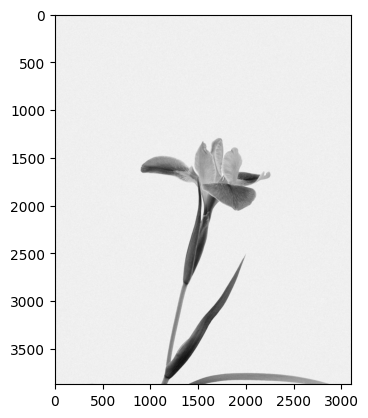

In [35]:
img = Image.open('img.jpg').convert('L')
img_array = np.array(img)
print(img_array.shape)
plt.imshow(img_array, cmap='gray')
plt.show()

In [36]:
U, S, VT = np.linalg.svd(img_array)

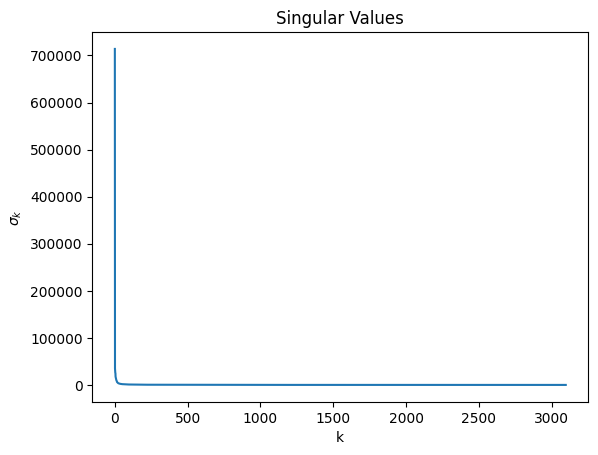

In [37]:
plt.plot(S)
plt.title('Singular Values')
plt.xlabel('k')
plt.ylabel(r'$\sigma_k$')
plt.show()

In [38]:
k = 50
Uk = U[:, :k]
Sk = np.diag(S[:k])
VTk = VT[:k, :]
print(Uk.shape)
print(Sk.shape)
print(VTk.shape)

(3872, 50)
(50, 50)
(50, 3098)


In [39]:
img_approx = np.dot(Uk, np.dot(Sk, VTk))

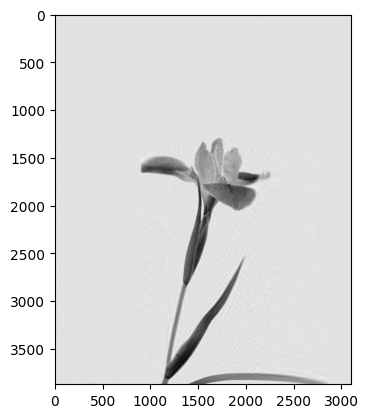

In [40]:
plt.imshow(img_approx, cmap='gray')
plt.show()

In [41]:
img_array.nbytes

11995456

In [42]:
Uk.nbytes + Sk.nbytes + VTk.nbytes

2808000

In [43]:
percentage = (Uk.nbytes + Sk.nbytes + VTk.nbytes) / (img_array.nbytes) * 100
percentage

23.408864156560618